In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import folium as fl

In [2]:
df = pd.read_csv("Space_Corrected.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [3]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [5]:
df.drop('Unnamed: 0.1', axis=1, inplace=True)

In [6]:
df.rename(columns={'Unnamed: 0': 'Count'}, inplace=True)

In [7]:
df

,Count,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...
4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Count           4324 non-null   int64         
 1   Company Name    4324 non-null   object        
 2   Location        4324 non-null   object        
 3   Datum           4198 non-null   datetime64[ns]
 4   Detail          4324 non-null   object        
 5   Status Rocket   4324 non-null   object        
 6    Rocket         964 non-null    object        
 7   Status Mission  4324 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 270.4+ KB


In [8]:
df["Company Name"].value_counts()

Company Name
RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'

In [9]:
df["Status Rocket"].value_counts()

Status Rocket
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64

In [10]:
df["Status Mission"].value_counts()

Status Mission
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

In [11]:
df["Company Name"].unique()

array(['SpaceX', 'CASC', 'Roscosmos', 'ULA', 'JAXA', 'Northrop', 'ExPace',
       'IAI', 'Rocket Lab', 'Virgin Orbit', 'VKS RF', 'MHI', 'IRGC',
       'Arianespace', 'ISA', 'Blue Origin', 'ISRO', 'Exos', 'ILS',
       'i-Space', 'OneSpace', 'Landspace', 'Eurockot', 'Land Launch',
       'CASIC', 'KCST', 'Sandia', 'Kosmotras', 'Khrunichev', 'Sea Launch',
       'KARI', 'ESA', 'NASA', 'Boeing', 'ISAS', 'SRC', 'MITT', 'Lockheed',
       'AEB', 'Starsem', 'RVSN USSR', 'EER', 'General Dynamics',
       'Martin Marietta', 'Yuzhmash', 'Douglas', 'ASI', 'US Air Force',
       'CNES', 'CECLES', 'RAE', 'UT', 'OKB-586', 'AMBA',
       "Arm??e de l'Air", 'US Navy'], dtype=object)

C:\Users\Mert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:1196: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  x_visible = any(t.get_visible() for t in ax.get_xticklabels())


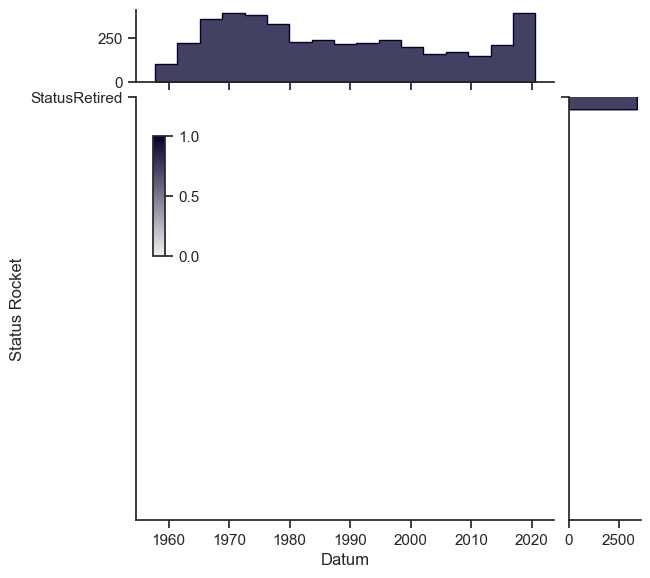

In [102]:
sb.set_theme(style="ticks")

# Load the planets dataset and initialize the figure
g = sb.JointGrid(data=comp_datum, x="Datum", y="Status Rocket", marginal_ticks=True)

# Set a log scaling on the y axis
g.ax_joint.set(yscale="log")

# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sb.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sb.histplot, element="step", color="#03012d")

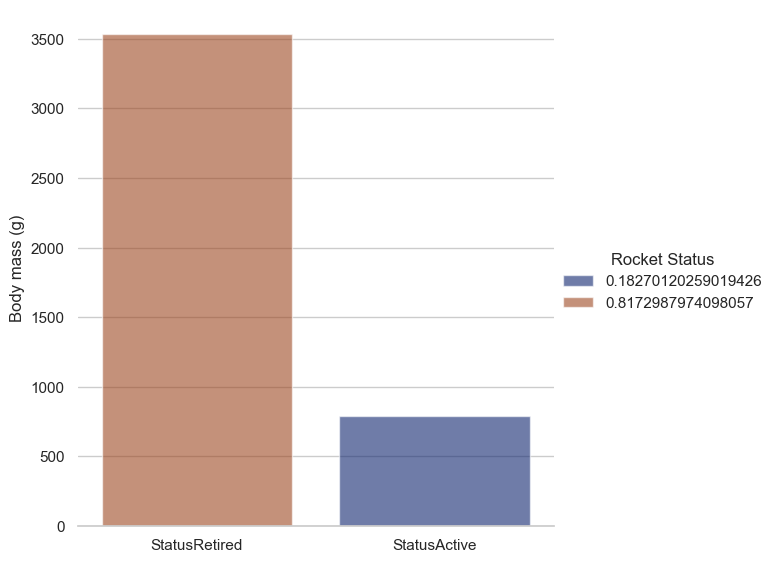

In [51]:
sb.set_theme(style="whitegrid")

penguins = stat_rocket

# Draw a nested barplot by species and sex
g = sb.catplot(
    data=penguins, kind="bar",
    x="Status Rocket", y="count", hue="percentage",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("Rocket Status")

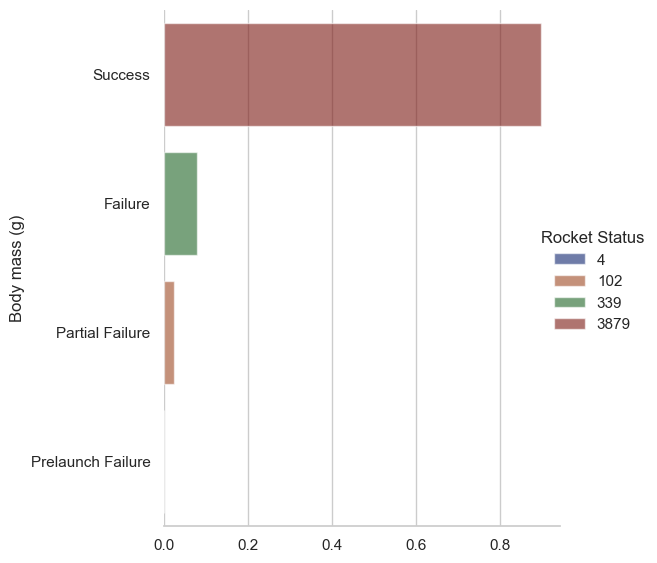

In [52]:
sb.set_theme(style="whitegrid")

penguins = stat_mission

# Draw a nested barplot by species and sex
g = sb.catplot(
    data=penguins, kind="bar",
    x="percentage", y="Status Mission", hue="count",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("Mission Status")

In [12]:
df['Datum'] = df['Datum'].str.replace(' UTC', '')

In [13]:
df

,Count,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...
4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [14]:
df['Datum'] = pd.to_datetime(df['Datum'], errors='coerce')

In [15]:
df

,Count,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...
4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00,Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [16]:
unique_years = df['Datum'].dt.year.unique()
unique_years

array([2020., 2019.,   nan, 2018., 2017., 2016., 2015., 2014., 2013.,
       2012., 2011., 2010., 2009., 2008., 2007., 2006., 2005., 2004.,
       2003., 2002., 2001., 2000., 1999., 1998., 1997., 1996., 1995.,
       1994., 1993., 1992., 1991., 1990., 1989., 1988., 1987., 1986.,
       1985., 1984., 1983., 1982., 1981., 1980., 1979., 1978., 1977.,
       1976., 1975., 1974., 1973., 1972., 1971., 1970., 1969., 1968.,
       1967., 1966., 1965., 1964., 1963., 1962., 1961., 1960., 1959.,
       1958., 1957.])

In [78]:
counts = df["Company Name"].value_counts()
percs = df["Company Name"].value_counts(normalize=True)
comp_name = pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])
comp_name.head()

,count,percentage
Company Name,,
RVSN USSR,1777,0.410962
Arianespace,279,0.064524
CASC,251,0.058048
General Dynamics,251,0.058048
NASA,203,0.046947


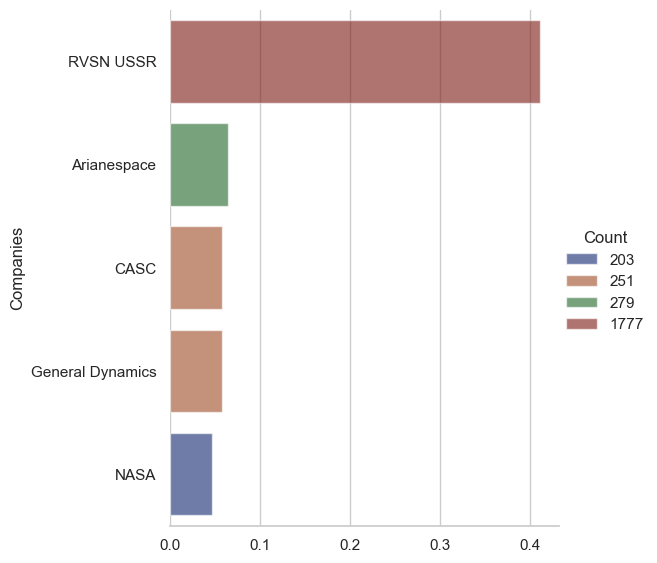

In [83]:
sb.set_theme(style="whitegrid")

birds = comp_name.head()

# Draw a nested barplot by species and sex
g = sb.catplot(
    data=birds, kind="bar",
    x="percentage", y="Company Name", hue="count",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Companies")
g.legend.set_title("Count")

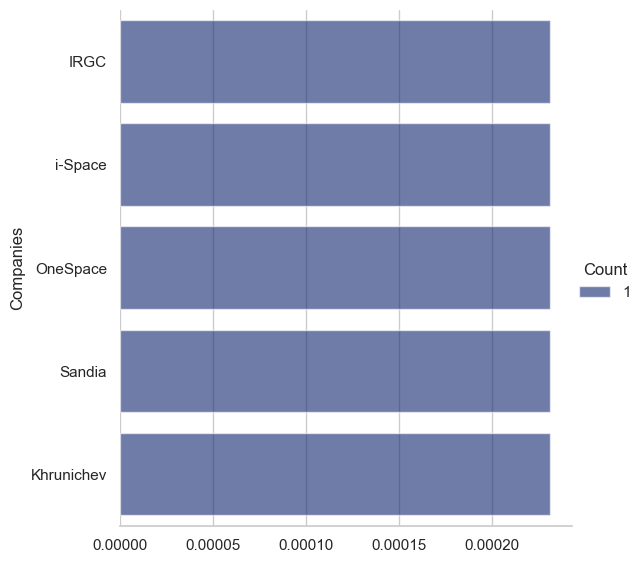

In [86]:
sb.set_theme(style="whitegrid")

birds = comp_name.tail()

# Draw a nested barplot by species and sex
g = sb.catplot(
    data=birds, kind="bar",
    x="percentage", y="Company Name", hue="count",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Companies")
g.legend.set_title("Count")

In [18]:
counts = df["Status Rocket"].value_counts()
percs = df["Status Rocket"].value_counts(normalize=True)
stat_rocket = pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])
stat_rocket

,count,percentage
Status Rocket,,
StatusRetired,3534,0.817299
StatusActive,790,0.182701


In [19]:
counts = df["Status Mission"].value_counts()
percs = df["Status Mission"].value_counts(normalize=True)
stat_mission = pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])
stat_mission

,count,percentage
Status Mission,,
Success,3879,0.897086
Failure,339,0.078400
Partial Failure,102,0.023589
Prelaunch Failure,4,0.000925


In [20]:
comp_rocket = df.groupby(["Count","Status Mission","Status Rocket","Company Name"])[["Count"]].count()
comp_rocket

,,,,Count
Count,Status Mission,Status Rocket,Company Name,
0,Success,StatusActive,SpaceX,1
1,Success,StatusActive,CASC,1
2,Success,StatusActive,SpaceX,1
3,Success,StatusActive,Roscosmos,1
4,Success,StatusActive,ULA,1
...,...,...,...,...
4319,Failure,StatusRetired,US Navy,1
4320,Success,StatusRetired,AMBA,1
4321,Failure,StatusRetired,US Navy,1


In [94]:
comp_datum = df.groupby(["Count","Datum","Status Rocket","Company Name"])[["Count"]].count()
comp_datum

,,,,Count
Count,Datum,Status Rocket,Company Name,
0,2020-08-07 05:12:00,StatusActive,SpaceX,1
1,2020-08-06 04:01:00,StatusActive,CASC,1
2,2020-08-04 23:57:00,StatusActive,SpaceX,1
3,2020-07-30 21:25:00,StatusActive,Roscosmos,1
4,2020-07-30 11:50:00,StatusActive,ULA,1
...,...,...,...,...
4319,1958-02-05 07:33:00,StatusRetired,US Navy,1
4320,1958-02-01 03:48:00,StatusRetired,AMBA,1
4321,1957-12-06 16:44:00,StatusRetired,US Navy,1


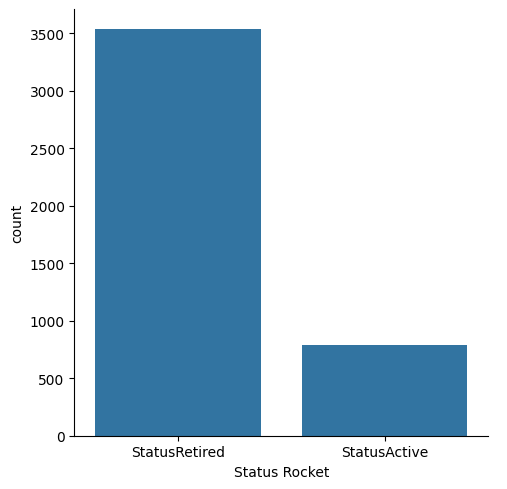

In [21]:
a = sb.catplot(x="Status Rocket", y="count", data=stat_rocket, kind="bar", height=5)

plt.show()

In [22]:
df_statretired = df[df["Status Rocket"] == "StatusRetired"].reset_index()
df_statactive = df[df["Status Rocket"] == "StatusActive"].reset_index()


In [23]:
df_statretired

,index,Count,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,29,29,MHI,"LA-Y2, Tanegashima Space Center, Japan",2020-05-20 17:31:00,H-IIB | HTV-9,StatusRetired,112.5,Success
1,64,64,VKS RF,"Site 133/3, Plesetsk Cosmodrome, Russia",2019-12-26 23:11:00,"Rokot/Briz KM | Gonets-M ???24, 25, 26 [block-...",StatusRetired,41.8,Success
2,98,98,Roscosmos,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",2019-09-25 13:57:00,Soyuz FG | Soyuz MS-15 (61S),StatusRetired,NaN,Success
3,100,100,MHI,"LA-Y2, Tanegashima Space Center, Japan",2019-09-24 16:05:00,H-IIB | HTV-8,StatusRetired,112.5,Success
4,105,105,VKS RF,"Site 133/3, Plesetsk Cosmodrome, Russia",2019-08-30 14:00:00,Rokot/Briz KM | Cosmos 2540,StatusRetired,41.8,Success
...,...,...,...,...,...,...,...,...,...
3529,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
3530,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00,Juno I | Explorer 1,StatusRetired,NaN,Success
3531,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
3532,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [24]:
df_statactive

,index,Count,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
785,2041,2041,CASC,"Site 138 (LA-2B), Jiuquan Satellite Launch Cen...",1986-10-06 05:40:00,Long March 2C | FSW-0 No.8,StatusActive,30.8,Success
786,2101,2101,CASC,"Site 138 (LA-2B), Jiuquan Satellite Launch Cen...",1985-10-21 05:04:00,Long March 2C | FSW-0 No.7,StatusActive,30.8,Success
787,2177,2177,CASC,"Site 138 (LA-2B), Jiuquan Satellite Launch Cen...",1984-09-12 05:44:00,Long March 2C | FSW-0 No.6,StatusActive,30.8,Success
788,2249,2249,CASC,"Site 138 (LA-2B), Jiuquan Satellite Launch Cen...",1983-08-19 06:00:00,Long March 2C | FSW-0 No.5,StatusActive,30.8,Success


In [25]:
df_succes = df[df["Status Mission"] == "Success"].reset_index()
df_failure = df[df["Status Mission"] == "Failure"].reset_index()
df_par_fail = df[df["Status Mission"] == "Partial Failure"].reset_index()
df_pre_fail = df[df["Status Mission"] == "Prelaunch Failure	"].reset_index()

In [26]:
df_succes

,index,Count,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
3874,4316,4316,AMBA,"LC-5, Cape Canaveral AFS, Florida, USA",1958-03-26 17:38:00,Juno I | Explorer 3,StatusRetired,NaN,Success
3875,4317,4317,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-03-17 12:15:00,Vanguard | Vanguard 1,StatusRetired,NaN,Success
3876,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00,Juno I | Explorer 1,StatusRetired,NaN,Success
3877,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [27]:
df_failure

,index,Count,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,11,11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China",2020-07-10 04:17:00,"Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.3,Failure
1,15,15,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand",2020-07-04 21:19:00,Electron/Curie | Pics Or It Didn??¦t Happen,StatusActive,7.5,Failure
2,27,27,Virgin Orbit,"Cosmic Girl, Mojave Air and Space Port, Califo...",2020-05-25 19:50:00,LauncherOne | Demo Flight,StatusActive,12.0,Failure
3,36,36,CASC,"LC-2, Xichang Satellite Launch Center, China",2020-04-09 11:46:00,Long March 3B/E | Nusantara Dua,StatusActive,29.15,Failure
4,43,43,CASC,"LC-201, Wenchang Satellite Launch Center, China",2020-03-16 13:34:00,Long March 7A | XJY-6,StatusActive,NaN,Failure
...,...,...,...,...,...,...,...,...,...
334,4314,4314,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-04-28 02:53:00,Vanguard | Vanguard TV5,StatusRetired,NaN,Failure
335,4315,4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27 09:01:00,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure
336,4318,4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05 18:27:00,Juno I | Explorer 2,StatusRetired,NaN,Failure
337,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure


In [28]:
df_par_fail

,index,Count,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,127,127,Exos,"Vertical Launch Area, Spaceport America, New M...",2019-06-29 18:00:00,SARGE | Launch 3,StatusActive,NaN,Partial Failure
1,157,157,Exos,"Vertical Launch Area, Spaceport America, New M...",2019-03-02 17:45:00,SARGE | Launch 2,StatusActive,NaN,Partial Failure
2,219,219,Exos,"Vertical Launch Area, Spaceport America, New M...",2018-08-25 18:15:00,SARGE | Launch 1,StatusActive,NaN,Partial Failure
3,277,277,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France",2018-01-25 22:20:00,Ariane 5 ECA | SES-14/GOLD & Al Yah-3,StatusActive,200.0,Partial Failure
4,336,336,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2017-07-14 06:36:00,Soyuz 2.1a/Fregat | Kanopus-V IK & Rideshares,StatusActive,48.5,Partial Failure
...,...,...,...,...,...,...,...,...,...
97,4277,4277,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1959-09-18 05:20:00,Vanguard | Vanguard 3,StatusRetired,NaN,Partial Failure
98,4280,4280,NASA,"LC-14, Cape Canaveral AFS, Florida, USA",1959-09-09 08:19:00,Atlas-D Mercury | Big Joe 1,StatusRetired,NaN,Partial Failure
99,4292,4292,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1959-01-02 16:41:00,Vostok | Luna-1,StatusRetired,NaN,Partial Failure
100,4294,4294,AMBA,"LC-5, Cape Canaveral AFS, Florida, USA",1958-12-06 05:44:00,Juno II | Pioneer 3,StatusRetired,NaN,Partial Failure


In [85]:
df_pre_fail
df_pre_fail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           0 non-null      int64         
 1   Count           0 non-null      int64         
 2   Company Name    0 non-null      object        
 3   Location        0 non-null      object        
 4   Datum           0 non-null      datetime64[ns]
 5   Detail          0 non-null      object        
 6   Status Rocket   0 non-null      object        
 7    Rocket         0 non-null      object        
 8   Status Mission  0 non-null      object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 132.0+ bytes
